<a id='top'></a>

# CSCI3022 F20
# Homework 7: Hypothesis Testing
***

**Name**: Aanvi Guliani

***

This assignment is due on Canvas by **MIDNIGHT on Monday November 23**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import random

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 1: A One-Sample Hypothesis


You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

The null hypothesis would be that the mean waiting time is 10 minutes  and the alternative hypothesis would be that the mean waiting time is greater than 10 minutes, which we can write as follows.  


$$\begin{array}{rl}
H_0: & \mu = 10 \\
H_a: & \mu > 10 \\
\end{array}$$

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?


We know that $P(\text{reject } H_0 | H_0 \text{ true}) = 0.05$ by the definition of significant level. Therefore we must rewrite this probability in terms of the exponential distribution.  
$$P(\text{reject } H_0 | H_0 \text{ true}) = \int_{c}^{\infty} \frac{1}{10}e^{-\frac{x}{10}}dx = 0.05$$  
Use the integral to solve for c.  
$$\int_{c}^{\infty} \frac{1}{10}e^{-\frac{x}{10}}dx$$  
$$= -e^{\frac{-x}{10}}\Big|_c^{\infty}$$  
$$= e^{\frac{-c}{10}} = 0.05$$
$$\frac{c}{10} = ln(0.05)$$  
$$= -10ln(0.05) = ~29.96$$  
You would reject if **X > 29.96 minutes.**

**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)


In terms of probability, Power is P(rejecting $H_0$ | $H_0$ is false), which is also equal to 1 - P(Type II Error). To calculate the probability of type II error, we find the z-score using the true rate and our sample mean and find the corresponding p-value associated with it. Since $\lambda = \frac{1}{60}$ our true mean wait time is 60 minutes.  
Z-Score:  
$$ Z = \frac{60 - 10}{10} = 5$$

In [2]:
# calculate the p-value
p_type2 = stats.norm.sf(5)

# calculate the power by taking the complement
power = 1 - p_type2
print("The probability of Type II error is", p_type2)
print("Since Power is the complement of P(Type II), the Power is",power)

The probability of Type II error is 2.8665157187919333e-07
Since Power is the complement of P(Type II), the Power is 0.9999997133484281


As shown above in the code output, the power is **0.9999997133484281**






**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?





This is different because Type I and Type II depend on whether or not the null hypothesis is correct but that doesn't apply in this case. 

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 2: Choosing your error levels

Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


One common way that p-values are being misused is their interperetation. Because of the way that it's worded, it can lead people to falsely believe that the p-value equates to the probability that the null-hypothesis is true. Additionally, this article claims that the interpretations of the p-value are overtrusted, and that the p-value alone doesn't provide enough evidence to make important business decisions. This article claims that using the gold standard of using a p-value of .05 doesn't adequately "weed out" false claims, and that most of the claims made are purely suggestive and not conclusive. It further claims that by lowering the p-value to .005 it will remove 1/3 of the purely "suggestive" hypotheses and make a move towards more "durable" solutions. I agree with what this article is saying. Having a p-value of .005 will lead to more accurate solutions. I think that having a p-value of .05 was fine when we didn't have access to the data we do now, and sampling was tougher. But now, when we have data so readily available and in a much higher volume than before, lowering the threshold makes sense.

---

<a id='p3'></a>
[Back to top](#top)

### [25 points] Problem 3 - Some Quick Hitters

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You're Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russell fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

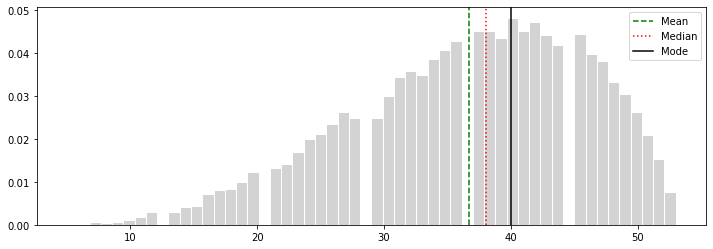

In [3]:
def drawCards():
    cards = ['AH','2H','3H','4H','5H','6H','7H','8H','9H','10H','JH','QH','KH',
            'AD','2D','3D','4D','5D','6D','7D','8D','9D','10D','JD','QD','KD',
            'AC','2C','3C','4C','5C','6C','7C','8C','9C','10C','JC','QC','KC',
            'AS','2S','3S','4S','5S','6S','7S','8S','9S','10S','JS','QS','KS','JOK1','JOK2']
    
    # declare end index for random. this will decrement every time we remove an array element
    # this is to ensure that we don't pick the same card twice
    # for range 0,5 pick a random index, append the card to the drawn card list, remove the drawn card from the cards
    # list, and decrement index since the size of cards has changed
    endIndex = 53
    found = False
    numCards = 0
    flip = 0
    while found == False:
        # get index, get card, remove it from deck, and increment toal number of drawn cards
        randIndex = random.randint(0,endIndex)
        drawnCard = cards[randIndex]
        cards.remove(cards[randIndex])
        endIndex = endIndex - 1
        numCards += 1
        
        # check to see if the card is one of the ones stated in the problem,
        # increment flip variable to indicate that card has been flipped
        if drawnCard == 'JOK1' or drawnCard == 'JOK2' or drawnCard == 'KC' or drawnCard == '8D' or drawnCard == '6H':
            flip +=1
        if flip == 4:
            return numCards
        if endIndex == 0:
            return 54

numArray = np.array(range(25000))
for i in range(0,25000):
    numCards = drawCards()
    numArray[i] = numCards
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
bins = 54
ax.hist(numArray, density=True, fc='lightgray', ec='white',bins=bins)
ax.axvline(x=numArray.mean(),color='green',linestyle='dashed',label='Mean')
ax.axvline(x=np.median(numArray),color='red',linestyle='dotted',label='Median')
ax.axvline(x=stats.mode(numArray)[0],color='black',label='Mode')
plt.legend(loc='best')
plt.show()

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

In general, a 99% confidence interval is wider. Imagine you are guessing the age of someone who walks past you in the park, and a younger looking person walks by. You are pretty sure that they are in their late teens. You could guess a single number, and possibly be wrong. Or you could guess the age plus or minus 5 years for good measure. Most likely you are feeling more confident that the person lies within the age range than simply guessing one number. If you want to be even more confident in your answer, you could tack on 5 years to each end. Confidence intervals are similar to this - but instead of guessing someone's age, you're finding out the range in which a test statistic, like the true mean, lies. You're 95% confident that the true mean of a dataset lies within the range [5,7], but to be even more "confident" in that answer you say that the true mean lies in the range [3,9]. Thus a higher confidence level has a wider confidence interval.

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by different "statistical measures". Compute a 95% confidence interval for the _mean_.


Since the sample is small, we need to use a t-distribution to calculate the confidence interval for the mean. We use the following formula:  
$$ \bar X \pm t_{\alpha/2}\frac{s}{\sqrt{n}}$$  

As shown in the code output below, we obtain a CI of [0.1640645  0.41944823]

In [19]:
# code to calculate interval
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])
x_bar_smith = np.mean(smith)
s_smith = np.std(smith)
sqrtn_smith = np.sqrt(len(smith))
alphaOver2 = (1-.95)/2
confidence = 1 - alphaOver2
t_alpha_2 = stats.t.ppf(confidence,len(smith))

# construct interval
helpSmith1 = t_alpha_2 * s_smith / sqrtn_smith
lb = x_bar_smith - helpSmith1
ub = x_bar_smith + helpSmith1
CI = np.array([lb,ub])
print("The 95% confidence interval for the mean is",CI)

The 95% confidence interval for the mean is [0.1640645  0.41944823]



***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


You would rather have a low Type II error rate. Type I error would mean that you reject the null hypothesis but the null hypothesis is true. In this situation, you probably would not use that carbon fiber and potentially lose money even though the carbon fiber strength is safe. Type II error would mean that you fail to reject the null hypothesis when the null hypothesis is false. This would mean that you would mistakenly believe that the carbon fiber is strong enough when it is not, and you would use the unsafe carbon fiber and potentially risk something going wrong with the airplane after it's built (ie crash, etc.) In Type I error, the worst case scenario is losing money and in Type II error, the worst case scenario is the plane crashing and people dying, so you would rather have a lower Type II error rate.


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

We can use a two sample CI for this. Let $\bar X = 63.9$ and $\bar Y = 47.2$. Construct a 97.5% confidence interval for $\mu_1 - \mu_2$. Since both sample sizes are greater than 30, we can assume a normal distribution and use the following formula for the confidence interval.

$$(\bar X - \bar Y) \pm Z_{\alpha/2}\sqrt{\frac{S_X^2}{n_x}+\frac{S_Y^2}{n_y}}$$

In [5]:
# x_bar - y_bar +- z_crit * sqrt((sx^2/nx^2)+(sy^2/ny^2))
# we don't know the population distribution / variance but n>30 for both so we can assume normal
y_bar = 47.2
s_y = 29.2
n_y = 49
x_bar = 63.9
s_x = 19.6
n_x = 65
alpha = .0025
alpha = .025/2
z_crit = stats.norm.ppf(1-alpha)

#extra vars just for code readability
h0 = x_bar - y_bar
h1 = (s_x**2) / n_x
h2 = (s_y**2) / n_y
h3 = h1 + h2
h4 = z_crit * np.sqrt(h3)

lb = h0 - h4
ub = h0 + h4
print("The confidence interval for the two means is [",lb,ub,"]")

The confidence interval for the two means is [ 5.87818587003736 27.52181412996263 ]


As shown from the code output above, the confidence interval for $\mu_1 - \mu_2$ is [5.87818587003736 , 27.52181412996263 ]. Therefore, with a .0025 significance level, there is not significant evidence to conclude that that the true mean of the baby dumbo octopus sucker width exceeds the true mean of the baby reef octopus sucker by more than 7mm

---

<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4 - Maybe we actually do some tests now?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

To construct a 97.5% confidence interval for the mean reaction time measurement, we use the following formula:    
$$ \bar X \pm t_{\alpha/2}\frac{s}{\sqrt{n}}$$

In [6]:
# code for exact calculations
# c = coffee, n = nap, cn = coffee and nap
x_bar_cn = 451.3
x_bar_c = 494.2
x_bar_n = 492.8
s_cn = 31.9
s_c = 39.6
s_n = 45.2
n = 15

# vars that will be the same across three intervals
alpha = (1-.975)/2
confidence = 1-alpha
t_crit = stats.t.ppf(confidence,n)

# interval for coffee + nap
h1 = t_crit * (s_cn / np.sqrt(n))
lb1 = x_bar_cn - h1
ub1 = x_bar_cn + h1


# interval for coffee
h2 = t_crit * (s_c / np.sqrt(n))
lb2 = x_bar_c - h2
ub2 = x_bar_c + h2

# interval for nap
h3 = t_crit * (s_n / np.sqrt(n))
lb3 = x_bar_n - h3
ub3 = x_bar_n + h3

print("The CI for the true mean of reaction times for coffee+nap group is [",lb1,ub1,']')
print("The CI for the true mean of reaction times for coffee group is [",lb2,ub2,']')
print("The CI for the true mean of reaction times for nap group is [",lb3,ub3,']')

The CI for the true mean of reaction times for coffee+nap group is [ 430.79199481620304 471.808005183797 ]
The CI for the true mean of reaction times for coffee group is [ 468.74178666839 519.65821333161 ]
The CI for the true mean of reaction times for nap group is [ 463.74163528816234 521.8583647118377 ]


1. The true mean of the reaction times for each group is shown above in the code output. However, we cannot draw any conclusions about which has a faster reaction time. To draw these kinds of conclusions, we would need a multiple sample confidence interval where we find the confidence interval for the **difference** between the true mean reaction times, not the reaction times themselves.

2. We use a t-distrbution for this confidence interval because our sample is small. We not only have to approximate $\mu$, we also have to approximate $\sigma$, because we cannot make the assumption that our distribution is normal. This means we have to use wider confidence intervals, and the t-distribution provides us the means to do so.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

Let $\mu_1$ be the mean reaction time after taking a nap. Let $\mu_2$ be the mean reaction time after drinking coffee. If the mean reaction time after taking a nap is faster, $\mu_1 - \mu_2$ will be less than 0. Thus, to determine whether taking a nap promotes a faster reaction time than drinking coffee, we use a left tailed hypothesis test, with the following hypotheses:  
$$\begin{array}{rl}
H_0: & \mu_1 - \mu_2 = 0 \\
H_a: & \mu_1 - \mu_2 < 0 \\
\end{array}$$    

If our $t_{stat} < -t_{\alpha,v}$, we reject the null hypothesis and have significant evidence to conclude that taking a nap promotes faster reaction time than drinking coffee. To calculate $t_{stat}$, we use the following formula:  
$$t_{stat} = \frac{\bar X - \bar Y - \Delta_0}{\sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}}$$

In [7]:
# vars
x_bar_diff = 494.2 - 492.8
s_c = 39.6
s_n = 45.2
n = 15

# code for calculating t_stat and t_alpha
t_crit_975 = stats.t.ppf(.975,n)
help1 = (s_c**2)/n
help2 = (s_n**2)/n
help3 = np.sqrt(help1+help2)
t_stat = x_bar_diff / help3

print("T_alpha is",-t_crit_975)
print("T_stat is",t_stat)

T_alpha is -2.131449545559323
T_stat is 0.09022936362055636


Our $t_{\alpha,v} = -2.1315$ and $t_{stat} = .09023$ as shown from the code output above. Since $t_{stat} > -t_{\alpha,v}$, we **do not** have significant evidence to conclude that taking a nap promotes faster reaction time than drinking coffee

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

To determine whether taking a coffee-nap promotes faster reaction than only drinking coffee or only taking a nap, we will conduct two left tailed tests. Let $\mu_1$ be the mean reaction time after a coffee nap, $\mu_2$ be the mean reaction time after drinking coffee, and $\mu_3$ be the mean reaction time after a nap. Our first test will be comparing the mean reaction time between coffee nap and coffee, with the following hypotheses:
$$\begin{array}{rl}
H_0: & \mu_1 - \mu_2 = 0 \\
H_a: & \mu_1 - \mu_2 < 0 \\
\end{array}$$    

If our $t_{stat} < -t_{\alpha,v}$, we reject the null hypothesis and have significant evidence to conclude that taking a nap promotes faster reaction time than drinking coffee. To calculate $t_{stat}$, we use the following formula:  
$$t_{stat} = \frac{\bar X - \bar Y - \Delta_0}{\sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}}$$

In [8]:
# coffee-nap versus coffee
x_bar_diff_cnc = 451.3 - 494.2
s_cn = 31.9
s_c = 39.6

# code for calculating t_stat and t_alpha
t_crit_cnc = stats.t.ppf(.975,n)
help1cnc = (s_cn**2)/n
help2cnc = (s_c**2)/n
help3cnc = np.sqrt(help1cnc+help2cnc)
t_stat_cnc = x_bar_diff_cnc / help3cnc

print("T_alpha is",-t_crit_cnc)
print("T_stat is",t_stat_cnc)

T_alpha is -2.131449545559323
T_stat is -3.2674426640629344


Our $t_{\alpha,v} = -2.1315$ and $t_{stat} = -3.26744$ as shown from the code output above. Since $t_{stat} < -t_{\alpha,v}$, we have significant evidence to conclude that taking a coffee nap promotes faster reaction time than drinking coffee

Our next test will be a left tailed test comparing the mean reaction time of coffee naps and naps, with the following hypotheses:  
$$\begin{array}{rl}
H_0: & \mu_1 - \mu_3 = 0 \\
H_a: & \mu_1 - \mu_3 < 0 \\
\end{array}$$  

  
We follow the same rules for rejection and calculate $t_{stat}$ using the same formula from the last test.

In [9]:
# coffee-nap versus nap
x_diff_cnn = 451.3 - 492.8
s_cn = 31.9
s_n = 45.2

# code for calculating t_stat and t_alpha
t_crit_cnn = stats.t.ppf(.975,n)
help1cnn = (s_cn**2)/n
help2cnn = (s_n**2)/n
help3cnn = np.sqrt(help1cnn+help2cnn)
t_stat_cnn = x_diff_cnn / help3cnn

print("T_alpha is",-t_crit_cnn)
print("T_stat is",t_stat_cnn)

T_alpha is -2.131449545559323
T_stat is -2.9052726242057902


Our $t_{\alpha,v} = -2.1315$ and $t_{stat} = -2.90527$ as shown from the code output above. Since $t_{stat} < -t_{\alpha,v}$, we have significant evidence to conclude that taking a coffee nap promotes faster reaction time than only taking a nap.

**Part D**: Compute a 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

Since we know that the previous experiments had a normal distribution, we can use the bootstrapping method to construct a confidence interval for the variance. Since standard deviation is the square root of variance, we can simply take the square root of the upper and lower bounds to get our confidence interval.

In [17]:
def bootstrapped_var(sample, num_boots=5000):

    b = np.array([np.std(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    L, U = np.percentile(b, 2.5), np.percentile(b, 97.5)
    CI = np.array([L, U])

    return CI 

sample = np.random.normal(451.3,31.9**2, size=500)
output = bootstrapped_var(sample)
CI = np.sqrt(output)
print("The CI for standard deviation is",CI)

The CI for standard deviation is [30.80018936 32.90518284]


As shown from the code output above, our 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers is [30.80018936 32.90518284]